# Day 1

In [1]:
from functools import reduce
from operator import add

def increasing(b):
    global a        
    result = b > a
    a = b    
    return result


with open('day1_1.txt', 'r') as f:
    g = (int(line.strip()) for line in f)
    a = next(g)
    g = (increasing(x) for x in g)
    n = reduce(add, g)
print(n)

1645


In [37]:
from itertools import tee

with open('day1_2.txt', 'r') as f, open('day1_1.txt', 'w') as w:
    g = (int(line.strip()) for line in f)
    t = tee(g, 3)
    for i, itr in enumerate(t):
        for _ in range(i):
            next(itr)
    w.writelines(f'{sum(t)}\n' for t in zip(*t))

# Day 2

In [27]:
h_pos = 0
depth = 0

def process_command(line):
    global h_pos, depth
    command, arg = line.split(' ')
    arg = int(arg)
    if command == 'down':
        depth += arg
    elif command == 'up':
        depth -= arg
    else:
        h_pos += arg
        
with open('day2.txt', 'r') as f:
    for line in f:
        process_command(line)
print(h_pos, depth, h_pos * depth)

1845 916 1690020


In [29]:
aim = 0
h_pos = 0
depth = 0

def process_command(line):
    global aim, h_pos, depth
    command, arg = line.split(' ')
    arg = int(arg)
    if command == 'down':
        aim += arg
    elif command == 'up':
        aim -= arg
    else:
        h_pos += arg
        depth += arg * aim
        
with open('day2.txt', 'r') as f:
    for line in f:
        process_command(line)
print(h_pos, depth, h_pos * depth)

1845 763408 1408487760


# Day 3

In [1]:
def process_line(line, r_ones, r_zeroes, lines):
    lines.append(line)
    for i in range(len(line)):
        n = int(line[i])
        r_ones[i] += n
        r_zeroes[i] += int(not n)
        
lines = []

with open('day3.txt', 'r') as f:
    line = next(f).strip()
    n = len(line)
    r_ones = [0] * n
    r_zeroes = [0] * n
    process_line(line, r_ones, r_zeroes, lines)
    for line in f:
        process_line(line.strip(), r_ones, r_zeroes, lines)

gamma = [int(a >= b) for a, b in zip(r_ones, r_zeroes)]
epsilon = [int(not a) for a in gamma]
gamma = f'0b{"".join(str(n) for n in gamma)}'
epsilon = f'0b{"".join(str(n) for n in epsilon)}'
gamma = eval(gamma)
epsilon = eval(epsilon)
print(gamma, epsilon, gamma * epsilon)

844 3251 2743844


In [2]:
def check(digit, n_ones, n_zeroes, isOx):
    if isOx:
        return ((digit == '1') and n_ones >= n_zeroes) or ((digit == '0') and n_ones < n_zeroes)
    else:
        return ((digit == '0') and n_ones >= n_zeroes) or ((digit == '1') and n_ones < n_zeroes)

def find_gas(lines, n_ones, n_zeroes, isOx):
    index = 0
    while True:        
        lines = [line for line in lines if check(line[index], n_ones, n_zeroes, isOx)]
        if len(lines) == 1:            
            return eval(f'0b{lines[0]}')
        index += 1
        n_ones = sum(int(line[index]) for line in lines)
        n_zeroes = sum(not int(line[index]) for line in lines)

o, c =[find_gas(lines, r_ones[0], r_zeroes[0], isOx) for isOx in (True, False)] 
print(o, c, o*c)

1981 3371 6677951


# Day 4

In [163]:
from itertools import islice, chain
import re

class Board:
    
    regexp = re.compile(r'\s+')
    
    @classmethod    
    def _format_el(cls, el, marked):
        if marked:
            return f'({el})'
        else:
            return el
    
    def __init__(self, lines):
        self.rows = [
            {int(el): False for el in Board.regexp.split(line)}
            for line in lines
        ]
        self.sidelen = len(self.rows)        
        self.win = False
        self.score = 0
        
    def play(self, n):
        had_n = False
        for row in self.rows:
            if n in row:
                row[n] = True
                had_n = True
        if had_n:
            self._check_win()
            if self.win:
                self._calc_score(n)
        return self.win
        
    def __bool__(self):
        return bool(self.sidelen)
    
    def __str__(self):
        arr = []
        arr.append(f'win: {self.win}, score: {self.score}')
        arr.extend(
            '\t'.join(f'{self._format_el(el, marked):^4}' for el, marked in row.items())
            for row in self.rows
        )
        return '\n'.join(arr)
            
    def _calc_score(self, n):
        self.score = sum(
            sum(k for k, v in row.items() if not v)
            for row in self.rows
        ) * n
    
    def _check_win(self):
        if not self.win:
            self.win = any(
                all(row.values())
                for row in self.rows
            )
        if not self.win:
            self.win = any(
                all(col)
                for col in zip(*[row.values() for row in self.rows])
            )

def board_generator(g):
    while True:
        result = Board(islice(g, 0, 5))
        if result:
            yield result
        else:
            break
    
def play_number(n, boards):
    boards = (board for board in boards if not board.win)
    return [
        board.score
        for board in boards
        if board.play(n)
    ]    

with open('day4.txt', 'r') as f:
    g = (line.strip() for line in f)
    line = next(g).split(',')
    inp_arr = [int(el) for el in line]
    g = (line for line in g if line)
    boards = [*board_generator(g)]
scores = chain.from_iterable(
    play_number(n, boards)
    for n in inp_arr
)
scores = [score for score in scores if score]
print(scores[0], scores[-1])

55770 2980


In [ ]:
# For checking that each number is unique in a row

regexp = re.compile(r'\s+')
with open('day4.txt', 'r') as f:
    g = (line.strip() for line in f)
    next(g)    
    g = (set(regexp.split(line)) for line in g if line)
    assert all(len(line) == 5 for line in g)

# Day 5

In [35]:
from collections import namedtuple
from itertools import chain

LineOfVents = namedtuple('LineOfVents', 'x0 y0 x1 y1')
def parse_line(line):
    g = (el.strip().split(',') for el in line.split('->'))
    g = (
        (int(el) for el in t)
        for t in g
    )
    (x0, y0), (x1, y1) = g
    return LineOfVents(x0, y0, x1, y1)

def minmax(a, b):
    return min(a, b), max(a, b)

def draw_point(x, y, canvas):    
    if canvas[y][x] == '.':
        canvas[y][x] = 1
    else:
        canvas[y][x] += 1
        
def draw_line(line, canvas):
    if line.y0 == line.y1:
        x0, x1 = minmax(line.x0, line.x1)
        y = line.y0
        for x in range(x0, x1+1):
            draw_point(x, y, canvas)
    elif line.x0 == line.x1:
        x = line.x0
        y0, y1 = minmax(line.y0, line.y1)
        for y in range(y0, y1+1):
            draw_point(x, y, canvas)
    else:
        x0, x1 = minmax(line.x0, line.x1)
        length = x1 - x0
        x0, y0, x1, y1 = line
        xc = 1 if x1 > x0 else -1
        yc = 1 if y1 > y0 else -1
        x, y = x0, y0
        for _ in range(length+1):
            draw_point(x, y, canvas)
            x += xc
            y += yc

with open('day5.txt', 'r') as f:
    n = max(max(parse_line(line)) for line in f)

print('max coord:', n)

canvas = [
    # ['.'] * (n+1)
    [0] * (n+1)
    for _ in range(n+1)
]
    
with open('day5.txt', 'r') as f:
    g = (parse_line(line) for line in f)
    # g = (v for v in g if (v.x0 == v.x1) or (v.y0 == v.y1))
    for line in g:
        draw_line(line, canvas)
c = chain.from_iterable(canvas)
print('number of intersections:', len([p for p in c if p > 1]))
# for row in canvas:
#     print(' '.join(str(el) for el in row))

max coord: 990
number of intersections: 19349


# Day 6

In [333]:
# Modeling approach -- works for part 1, but too time-consuming for part 2

days_passed = 0

def pass_day(fishes):
    global days_passed
    requires_printing = False
    days_passed += 1
    new_fishes = []
    for i, fish in enumerate(fishes):
        fish -= 1
        if fish < 0:
            fish = 6
            new_fishes.append(8)
            requires_printing = True
        fishes[i] = fish
    fishes.extend(new_fishes)
    # if requires_printing:
    #     print(days_passed, fishes)
    

def pass_days(days, fishes):
    for _ in range(days):
        pass_day(fishes)

with open('day6.txt', 'r') as f:
    fishes = [int(x) for x in f.read().strip().split(',')]

# fishes = [3]
        
pass_days(18, fishes)
# pass_days(80, fishes)
# pass_days(256, fishes)
# print(fishes)
print(len(fishes))
# print(fishes)

26


In [ ]:
# Calculating approach -- same problem as the modeling approach

def direct_children(days_till_new_child, days_total):
    # because the child would be created after 0, when the timer gets reset to 6
    days_till_new_child += 1    
    if days_total < days_till_new_child:
        # The fish won't be able to make any children in such a short amount of days
        return 0
    else:
        # The fish would make 1 child + a child per each 7 days until the end of the period
        return 1 + (days_total - days_till_new_child) // 7
    
def total_children(days_till_new_child, days_total):
    dc = direct_children(days_till_new_child, days_total)
    if dc == 0:
        return 0
    return dc + sum(
        total_children(
            days_till_new_child = 8,
            days_total = days_total - ( (days_till_new_child + 1) + (7 * i) )            
        )
        for i in range(dc)
    )
    
with open('day6.txt', 'r') as f:
    fishes = [int(x) for x in f.read().strip().split(',')]
    
s = set(fishes)
for fish in s:
    print(total_children(fish, 256))
# len(fishes) + sum(total_children(fish, 256) for fish in fishes)

In [41]:
# Works for both parts

from collections import Counter

def pass_day(fishes):
    n = fishes[0]
    fishes[0] = 0
    for i in range(1, 9):        
        fishes[i-1] += fishes[i]
        fishes[i] = 0
    fishes[8] += n
    fishes[6] += n
    
def pass_days(days, fishes):
    for _ in range(days):
        pass_day(fishes)

with open('day6.txt', 'r') as f:
    fishes = [int(x) for x in f.read().strip().split(',')]

fishes = Counter(fishes)
pass_days(256, fishes)
sum(fishes.values())

1732821262171

# Day 7

In [16]:
def align(positions, target):
    return sum(abs(target - position) for position in positions)

def align_optimal(positions):
    results = {
        align(positions, i): i
        for i in range(min(positions), max(positions) + 1)
    }
    optimal_fuel = min(results)
    return results[optimal_fuel], optimal_fuel

with open('day7.txt', 'r') as f:
    positions = [int(el) for el in f.read().strip().split(',')]

print(align_optimal(positions))

(2, 37)


In [25]:
def align(positions, target):
    return sum(abs(target - position) * (1 + abs(target - position)) // 2 for position in positions)

def align_optimal(positions):
    results = {
        align(positions, i): i
        for i in range(min(positions), max(positions) + 1)
    }
    optimal_fuel = min(results)
    return results[optimal_fuel], optimal_fuel

with open('day7.txt', 'r') as f:
    positions = [int(el) for el in f.read().strip().split(',')]

print(align_optimal(positions))

(484, 93397632)


# Day 8

In [10]:
from itertools import chain

with open('day8.txt', 'r') as f:
    g = (line.strip().split('|') for line in f)        
    g = (arr[1].strip().split(' ') for arr in g)
    g = chain.from_iterable(g)    
    unique_outputs = [s for s in g if len(s) in {2, 4, 3, 7}]
print(len(unique_outputs))
    

440


In [41]:
from collections import Counter

working_display = {
    'abcefg': '0',
    'cf': '1',
    'acdeg': '2',
    'acdfg': '3',
    'bcdf': '4',
    'abdfg': '5',
    'abdefg': '6',
    'acf': '7',
    'abcdefg': '8',
    'abcdfg': '9'
}

def formalize(data):
    return data.strip().split(' ')

def analyze_patterns(patterns):
    mapping = {}
    patterns = formalize(patterns)
    
    #Counting how many times each segment is used for making 10 digits
    counter = Counter(''.join(patterns))    
    segments_by_usage = {v: k for k, v in counter.items()}
    
    # each of these segments have unique amount of usages.
    # for example, segment f is used in all digits except 2, so it has 9 usages out of 10
    # no other segment is used 9 times to make numbers 0-9
    # similarily, only segment b is used 6 times out of 10
    # and only segment e is used 4 times out of 10
    b, e, f = (segments_by_usage[i] for i in [6, 4, 9])
    mapping[b] = 'b'
    mapping[e] = 'e'
    mapping[f] = 'f'
    
    patterns_by_length = {len(pattern): pattern for pattern in patterns}
    
    # the pattern with length 2 corresponds to number 1 which consists of segments c and f
    # as we already know segment f, we can now find segment c
    c = next(segment for segment in patterns_by_length[2] if segment != f)
    mapping[c] = 'c'
    
    # the pattern with length 3 corresponds to number 7 which consists of segments a, c and f
    # as we already know the other two, we can now find segment a
    a = next(segment for segment in patterns_by_length[3] if segment not in {c, f})
    mapping[a] = 'a'
    
    # the pattern with length 4 corresponds to number 4 which consists of segments b, c, d and f
    # as we already know the other three, we can now find segment d
    d = next(segment for segment in patterns_by_length[4] if segment not in {b, c, f})
    mapping[d] = 'd'
    
    # the pattern with length 7 corresponds to number 8 which consists of all segments
    # as we already know the other six, we can now find segment g
    g = next(segment for segment in patterns_by_length[7] if segment not in {a, b, c, d, e, f})
    mapping[g] = 'g'
    return mapping

def read_output(output, mapping):
    # finding which segments were supposed to be activated and creating a combination of them
    output = sorted(mapping[c] for c in output)
    output = ''.join(output)
    # returning the value that corresponds to this combination of segments
    return working_display[output]

def read_outputs(outputs, mapping):
    return ''.join(read_output(output, mapping) for output in formalize(outputs))

def process_line(line):
    patterns, outputs = line.split('|')
    # dictionary {wrongly_wired_segment: correctly_wired_segment}
    mapping = analyze_patterns(patterns)
    return int(read_outputs(outputs, mapping))
    
with open('day8.txt', 'r') as f:
    n = sum(process_line(line) for line in f)
print(n)

1046281


# Day 9

In [50]:
def parse_line(line):
    return [int(n) for n in line.strip()]

def get_height(i, j, lines):
    if (i < 0) or (j < 0) or (i >= len(lines)) or (j >= len(lines[i])):
        return 9
    else:
        return lines[i][j]

def check_point(m, n, height, lines):
    points = [get_height(m+i, n, lines) for i in [-1, 1]] + [get_height(m, n+i, lines) for i in [-1, 1]]
    return min(points) > height

def find_low_points(lines):
    for i, line in enumerate(lines):
        for j, height in enumerate(line):
            if check_point(i, j, height, lines):
                yield i, j, height

with open('day9.txt', 'r') as f:
    lines = [parse_line(line) for line in f]
    
low_points = [*find_low_points(lines)]

sum(t[2] + 1 for t in low_points)

468

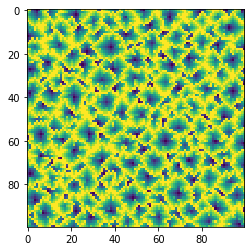

In [51]:
import matplotlib.pyplot as plt

plt.imshow(lines)
plt.show()

In [52]:
from functools import reduce
from operator import mul
from enum import Enum

class Direction(Enum):
    UP = 1,
    DOWN = 2
    LEFT = 3
    RIGHT = 4
        
    def antidirection(self):
        if self is Direction.UP:
            return Direction.DOWN
        elif self is Direction.DOWN:
            return Direction.UP
        elif self is Direction.LEFT:
            return Direction.RIGHT
        elif self is Direction.RIGHT:
            return Direction.LEFT

class Point:
    def __init__(self, m, n, *, search_direction=None, origin=None):
        self.m, self.n = m, n
        self.neighbours = {}
        if origin:
            self.set_neighbour(origin, search_direction.antidirection())     
            origin.set_neighbour(self, search_direction)
            
    def set_neighbour(self, point, search_direction):
        self.neighbours[search_direction] = point
        
    def is_explored(self, direction):
        return direction in self.neighbours
    
    def is_fully_explored(self):
        return all(
            self.is_explored(direction)
            for direction in Direction.__members__.values()
        )
            
def search(origin, direction, basin):
    if direction is Direction.UP:
        m = origin.m - 1
        n = origin.n
    elif direction is Direction.DOWN:
        m = origin.m + 1
        n = origin.n
    elif direction is Direction.LEFT:
        m = origin.m
        n = origin.n - 1
    else:
        m = origin.m
        n = origin.n + 1
    if (m, n) in basin:
        point = basin[(m, n)]
        origin.set_neighbour(point, direction)
        point.set_neighbour(origin, direction.antidirection())
        return None
    height = get_height(m, n, lines)    
    if height == 9:
        origin.set_neighbour(None, direction)
        return None
    else:
        point = Point(m, n, search_direction=direction, origin=origin)
        basin[(point.m, point.n)] = point
        return point
    
def explore(origin, basin):
    for direction in Direction.__members__.values():
        if origin.is_explored(direction):
            continue        
        point = origin
        while point:
            point = search(point, direction, basin)

def explore_basin(m, n):
    origin = Point(m, n)
    basin = {(m,  n): origin}    
    while True:
        unexplored = [point for point in basin.values() if not point.is_fully_explored()]
        if not unexplored:
            break
        for point in unexplored:
            explore(point, basin)
    return basin

basin_sizes = sorted(
    (len(explore_basin(m, n)) for m, n, _ in low_points),
    reverse=True
)
reduce(mul, basin_sizes[:3], 1)

1280496

# Day 10

In [29]:
from collections import deque

opening_tokens = {
    '(': ')',
    '[': ']',
    '{': '}',
    '<': '>'
}
closing_tokens = {v: k for k, v in opening_tokens.items()}

scores = dict(zip(closing_tokens, (3, 57, 1197, 25137)))

def check_line(line):
    sequence = deque()    
    for c in line:
        if c in opening_tokens:
            sequence.append(c)
        elif c in closing_tokens:
            if (len(sequence) == 0) or (sequence.pop() != closing_tokens[c]):
                return c        

with open('day10.txt', 'r') as f:
    illegal_characters = (check_line(line.strip()) for line in f)
    print(sum(scores[ic] for ic in illegal_characters if ic))

240123


In [30]:
from functools import reduce

completion_scores = dict(zip(closing_tokens, range(1, 5)))

def complete_line(line):
    sequence = []
    for c in line:
        if c in opening_tokens:
            sequence.append(c)
        elif c in closing_tokens:
            sequence.pop()
    return [opening_tokens[c] for c in sequence[::-1]]

with open('day10.txt', 'r') as f:
    lines = (line.strip() for line in f)
    completion_sequences = (complete_line(line) for line in lines if not check_line(line))
    final_scores = (
        reduce(
            lambda total, c: total * 5 + completion_scores[c],
            seq,
            0
        )
        for seq in completion_sequences
    )
    final_scores = sorted(final_scores)
final_scores[len(final_scores) // 2]

3260812321

# Day 11

In [74]:
def find_new_flashes(lines, known_flashes=set()):
    return set(
        (i, j)
        for i, line in enumerate(lines)
        for j, n in enumerate(line)
        if ((i, j) not in known_flashes) and (not n)
    )

def check_index(index, lines):
    return (index >= 0) and index < len(lines)

def flash(m, n, lines):
    for i in range(m-1, m+2):
        for j in range(n-1, n+2):
            if all(check_index(k, lines) for k in (i, j)):
                if lines[i][j]:
                    lines[i][j] = (lines[i][j] + 1) % 10

def tick(lines):
    for line in lines:
        for j, n in enumerate(line):
            line[j] = (n + 1) % 10
    known_flashes = set()
    while True:
        flashes = find_new_flashes(lines, known_flashes)
        if not flashes:
            break
        for m, n in flashes:
            flash(m, n, lines)
        known_flashes.update(flashes)

with open('day11.txt', 'r') as f:
    lines = [
        [int(n) for n in line.strip()]
        for line in f
    ]
lines

[[5, 4, 8, 3, 1, 4, 3, 2, 2, 3],
 [2, 7, 4, 5, 8, 5, 4, 7, 1, 1],
 [5, 2, 6, 4, 5, 5, 6, 1, 7, 3],
 [6, 1, 4, 1, 3, 3, 6, 1, 4, 6],
 [6, 3, 5, 7, 3, 8, 5, 4, 7, 8],
 [4, 1, 6, 7, 5, 2, 4, 6, 4, 5],
 [2, 1, 7, 6, 8, 4, 1, 7, 2, 1],
 [6, 8, 8, 2, 8, 8, 1, 1, 3, 4],
 [4, 8, 4, 6, 8, 4, 8, 5, 5, 4],
 [5, 2, 8, 3, 7, 5, 1, 5, 2, 6]]

In [77]:
tick(lines)
lines

[[0, 0, 5, 0, 9, 0, 0, 8, 6, 6],
 [8, 5, 0, 0, 8, 0, 0, 5, 7, 5],
 [9, 9, 0, 0, 0, 0, 0, 0, 3, 9],
 [9, 7, 0, 0, 0, 0, 0, 0, 4, 1],
 [9, 9, 3, 5, 0, 8, 0, 0, 6, 3],
 [7, 7, 1, 2, 3, 0, 0, 0, 0, 0],
 [7, 9, 1, 1, 2, 5, 0, 0, 0, 9],
 [2, 2, 1, 1, 1, 3, 0, 0, 0, 0],
 [0, 4, 2, 1, 1, 2, 5, 0, 0, 0],
 [0, 0, 2, 1, 1, 1, 9, 0, 0, 0]]

In [ ]:
class Octopus:
    def __init__(self, energy, tln=None, tn=None, trn=None, ln=None):
        self.energy = energy
        self.tln = tln
        self.tn = tn
        self.trn = trn
        self.ln = ln